###SULEIMAN ABUBAKAR###
**Saving Lives: An AI-Powered Approach to Heart Disease Prediction by AL_Fullani**

##Data Science Nigeria X Microsoft 2024 AI Bootcamp Qualification Hackathon
***Heart Disease prediction for the DSN AI Bootcamp 2024***


The challenge is to develop an advanced predictive model to assess the likelihood of heart disease, a leading cause of global mortality. Early detection is crucial for improving patient outcomes, but traditional diagnostic methods are often costly and time-consuming. The goal is to utilize machine learning techniques to create a model that accurately predicts heart disease risk based on easily accessible patient data, ensuring high accuracy and generalizability for new cases.

The Dataset in this Challenge is split into both Train and Test.
The Train Dataset.csv file contains information about heart disease patient, including their age, sex, chest pain type, blood pressure, cholesterol levels, and other medical indicatiors which are abbreviated in each csv file (Train and Test). By analysing this data, I will identify patterns and relationships that could help predict the risk of heart disease and develop strategies for prevention and treatment if need be.

### Import the neccessary tools and Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of seaborn
sns.set_style('whitegrid')

In [ ]:
# Load the dataset
train = pd.read_csv('/content/Train Dataset .csv', encoding= 'UTF-8-SIG')
test = pd.read_csv('/content/Test Dataset.csv', encoding= 'UTF-8-SIG')
Submission = pd.read_csv('/content/Sample Submission.csv')

In [ ]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [ ]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [ ]:
Submission.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [ ]:
# Display basic information and description of the datasets
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

In [ ]:
print(train.describe())
print(test.describe())

                 Id          Age          Sex           cp     trestbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008   136.506093     0.503218   
std     127.291998     0.499986     0.815806    38.141966     0.500024   
min     126.000000     0.000

In [ ]:
# Check for missing values
print(train.isnull().sum)
print(test.isnull().sum)

<bound method DataFrame.sum of          Id    Age    Sex     cp  trestbps   chol    fbs  restecg  thalach  \
0     False  False  False  False     False  False  False    False    False   
1     False  False  False  False     False  False  False    False    False   
2     False  False  False  False     False  False  False    False    False   
3     False  False  False  False     False  False  False    False    False   
4     False  False  False  False     False  False  False    False    False   
...     ...    ...    ...    ...       ...    ...    ...      ...      ...   
7298  False  False  False  False     False  False  False    False    False   
7299  False  False  False  False     False  False  False    False    False   
7300  False  False  False  False     False  False  False    False    False   
7301  False  False  False  False     False  False  False    False    False   
7302  False  False  False  False     False  False  False    False    False   

      exang  oldpeak  slope     

**Based on the infromation, the Train dataset contains 7,303 rows and include columns such as Age, Sex, cp (Chest pain type), trestbps (testing blood pressure), chol (cholesterol) and a target variable indicating the presence of heart disease.**

**On the descriprtion: the mean values for the key features are as follows:
Age: 53.17
Sex: 0.5 (Indicatin a binary representation)
cp: 1.5
trestbps: 147.45
chol: 342.81

After Understanding the data, I will explore potential relationships between features, such as correlation, and visualize the data to gain more insights.

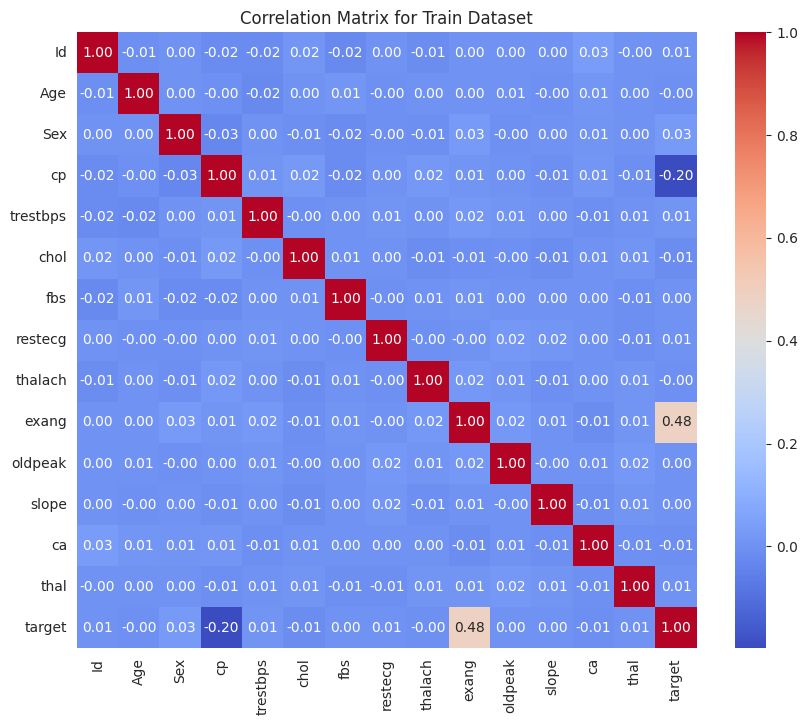

In [ ]:
# plotting the correlation matrix for the train dataset
plt.figure(figsize=(10, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix for Train Dataset')
plt.show()

## From the heatmap above, we can see that there are possibly strong correlation between chol (cholesterol) and trestbps (resting blood pressure). It can also observe that the target variable (indicating the presence of heart disease) shows notable correlations with cp (chest pain).

### Creating Visualization of each correlated feature.

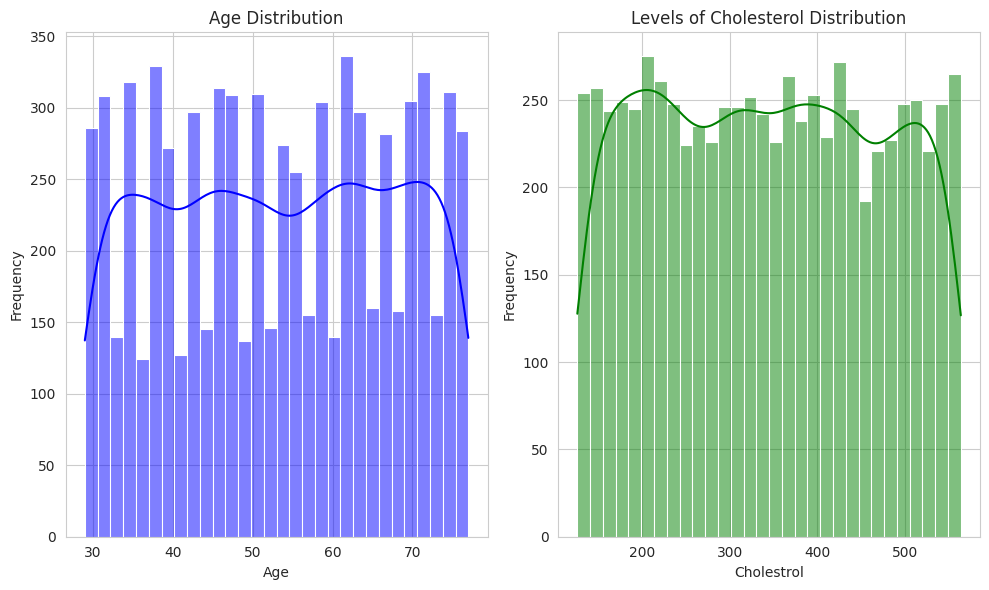

In [ ]:
# Plotting the relationship between Distribution of Age and Cholestrol levels
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Distribution of Cholesterol
plt.subplot(1, 2, 2)
sns.histplot(train['chol'], bins=30, kde=True, color='green')
plt.title('Levels of Cholesterol Distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

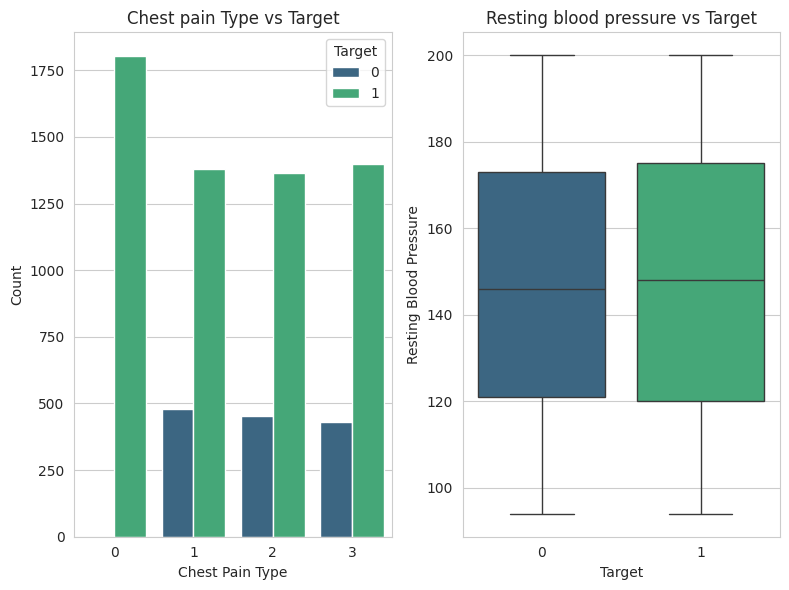

In [ ]:
# Plotting the relationship between Chest pain Type and Target
plt.figure(figsize=(8, 6))

# Chest pain and the Target
plt.subplot(1, 2, 1)
sns.countplot(x='cp', hue='target', data=train, palette='viridis')
plt.title('Chest pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')

# Resting Blood Preessure and Target
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='trestbps', data=train, hue='target', palette='viridis', legend=False)
plt.title('Resting blood pressure vs Target')
plt.xlabel('Target')
plt.ylabel('Resting Blood Pressure')

plt.tight_layout()
plt.show()

**As I would be seen from the figure above, the count plot shows different types of chest pain related to the presence of heart disease, indicating that certain types are more prevalent in patient with heart disease.**

**The box plot, on the other hand, illustrates the distribution of resting blood pressure across the target variables, suggesting that individuals with heart disease tend to have higher resting blood pressure.**

## This data does not have any missing values. As such, I will proceed with the feature importance analysis.

The most influential feature for predicting heart disease is Random Forest Classifier. With exang (exercise induced angina) being the most significant, I will build model and predict the insight.
To build the model, i will use some selected features based on their importance from the Random Forest Analysis. The model will be trained using the training dataset, and I will evaluate its performance using accuracy score as the primary metric, as it was stated clearly in the challenge objectives. Below are the steps I will follow to proceed:
1) Selecting the feature based on their importance
2) Train a Random Forest Classifier using those selected features
3) Evaluate the model's performance on the test dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

y = train['target']

# Feature Selection
Selected_features = ['exang', 'cp', 'Id', 'chol', 'thalach', 'trestbps', 'oldpeak', 'Age']
X_selected = train[Selected_features]

# Train a Random Forest Classifier with Selected Features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardizing the selected features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Training the Random Forest Classifier with selected features
selected = RandomForestClassifier(random_state=42)
selected.fit(X_train_selected_scaled, y_train)

# Evaluating the model
accuracy = selected.score(X_test_selected_scaled, y_test)
accuracy

0.8234086242299795

**The model built using the selected features achieved an accuracy of approximately 82.34% on the test dataset, indicating a good level of predictive performance. This suggests that the chosen features are effective in predicting the presence of heart disease.**

In [ ]:
from sklearn.metrics import classification_report

# Predicting the test set results
y_pred = selected.predict(X_test_selected_scaled)

# Generating the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report

{'0': {'precision': 0.50390625,
  'recall': 0.49615384615384617,
  'f1-score': 0.5,
  'support': 260.0},
 '1': {'precision': 0.891286307053942,
  'recall': 0.8942547876769359,
  'f1-score': 0.8927680798004988,
  'support': 1201.0},
 'accuracy': 0.8234086242299795,
 'macro avg': {'precision': 0.6975962785269709,
  'recall': 0.695204316915391,
  'f1-score': 0.6963840399002494,
  'support': 1461.0},
 'weighted avg': {'precision': 0.8223480354358551,
  'recall': 0.8234086242299795,
  'f1-score': 0.8228709540317585,
  'support': 1461.0}}

**The model has a precision of approximately 50.39% for the negative class (no heart disease) and 89.13% for the positive class (presence of heart disease).
The recall for the negative class is about 49.62%, while for the positive class, it is 89.43%.
The overall accuracy of the model is approximately 82.34%.
The model performs well in identifying positive cases of heart disease but struggles with negative cases, as indicated by the lower precision and recall for that class.**

## Adjusting the Model using different Algorithms

To adjust the model, I will be using different algorithms, specifically, Logistic Regression and Support Vector Machine (SVM), to see if the model can improve performance metrics. This will determine if a different approach yields better results in predicting heart disease.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Training the Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_selected_scaled, y_train)

# Evaluating the SVM model
svm_accuracy = svm_model.score(X_test_selected_scaled, y_test)
svm_y_pred = svm_model.predict(X_test_selected_scaled)
svm_report = classification_report(y_test, svm_y_pred, output_dict=True)

svm_accuracy, svm_report

(0.8254620123203286,
 {'0': {'precision': 0.5104602510460251,
   'recall': 0.46923076923076923,
   'f1-score': 0.48897795591182364,
   'support': 260.0},
  '1': {'precision': 0.8870703764320785,
   'recall': 0.9025811823480433,
   'f1-score': 0.8947585637639289,
   'support': 1201.0},
  'accuracy': 0.8254620123203286,
  'macro avg': {'precision': 0.6987653137390518,
   'recall': 0.6859059757894063,
   'f1-score': 0.6918682598378763,
   'support': 1461.0},
  'weighted avg': {'precision': 0.8200487250971203,
   'recall': 0.8254620123203286,
   'f1-score': 0.8225457245842251,
   'support': 1461.0}})

Support Vector Machine (SVM) achieved an accuracy of 83%.  The SVM model has a precision of approximately 51% for the negative class and 88.70% for the positive class.
The recall for the negative class is around 46.92%, indicating room for improvement in identifying negative cases, with a 90% positive class.

In [ ]:
# Training the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_selected_scaled, y_train)

# Evaluating the Logistic Regression model
log_reg_accuracy = log_reg.score(X_test_selected_scaled, y_test)
log_reg_y_pred = log_reg.predict(X_test_selected_scaled)
log_reg_report = classification_report(y_test, log_reg_y_pred, output_dict=True)

In [ ]:
log_reg_accuracy, log_reg_report

(0.8254620123203286,
 {'0': {'precision': 0.5153374233128835,
   'recall': 0.3230769230769231,
   'f1-score': 0.39716312056737585,
   'support': 260.0},
  '1': {'precision': 0.864406779661017,
   'recall': 0.9342214820982515,
   'f1-score': 0.8979591836734695,
   'support': 1201.0},
  'accuracy': 0.8254620123203286,
  'macro avg': {'precision': 0.6898721014869502,
   'recall': 0.6286492025875873,
   'f1-score': 0.6475611521204226,
   'support': 1461.0},
  'weighted avg': {'precision': 0.8022862918783239,
   'recall': 0.8254620123203286,
   'f1-score': 0.8088373654615705,
   'support': 1461.0}})

**The Logistic Regression model achieved an accuracy of approximately 83%, which is an improvement over the previous Random Forest model and slightly, in SVM models. The precision and recall metrics indicate that while the model performs well in identifying positive cases of heart disease, it still struggles with negative cases, as shown in the classification report, but this time, in an improved performance.**

In [ ]:
from sklearn.model_selection import GridSearchCV

 # Find the best combination of hyperparameters
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid, cv=5)
grid.fit(X_train_selected_scaled, y_train)
print(grid.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [ ]:
# Train Logistic Regression with best hyperparameters
best_log_reg = LogisticRegression(random_state=42, C=0.1, penalty='l2')
best_log_reg.fit(X_train_selected_scaled, y_train)

# Evaluate the model
best_log_reg_accuracy = best_log_reg.score(X_test_selected_scaled, y_test)
best_log_reg_y_pred = best_log_reg.predict(X_test_selected_scaled)
best_log_reg_report = classification_report(y_test, best_log_reg_y_pred, output_dict=True)

best_log_reg_accuracy, best_log_reg_report

(0.8254620123203286,
 {'0': {'precision': 0.5153374233128835,
   'recall': 0.3230769230769231,
   'f1-score': 0.39716312056737585,
   'support': 260.0},
  '1': {'precision': 0.864406779661017,
   'recall': 0.9342214820982515,
   'f1-score': 0.8979591836734695,
   'support': 1201.0},
  'accuracy': 0.8254620123203286,
  'macro avg': {'precision': 0.6898721014869502,
   'recall': 0.6286492025875873,
   'f1-score': 0.6475611521204226,
   'support': 1461.0},
  'weighted avg': {'precision': 0.8022862918783239,
   'recall': 0.8254620123203286,
   'f1-score': 0.8088373654615705,
   'support': 1461.0}})

***Based on the performance metrics, the Random Forest model achieved an accuracy of approximately 82.34%, which is good but, The SVM and Logistic Regression models performed better with an accuracy of about 82.55%.***

In [ ]:
print(test.columns)

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
test = test.rename(columns={'id': 'Id', 'age': 'Age'})

In [ ]:
submission = pd.read_csv('/content/Sample Submission.csv')

In [ ]:
# Prepare the test data for prediction
Selected_features = ['exang', 'cp', 'Id', 'chol', 'thalach', 'trestbps', 'oldpeak', 'Age']
test_selected = test[Selected_features]

# Scale the test data using the same scaler used for training
test_selected_scaled = scaler.transform(test_selected)

# Make predictions using your trained model (best_log_reg in this case)
predictions = best_log_reg.predict(test_selected_scaled)

# Replace the 'target' column in the submission file with your predictions
submission['target'] = predictions

# Save the updated submission file
submission.to_csv('my_submission.csv', index=False)

In [ ]:
submission.head()

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
